In [1]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml

In [12]:
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)

# PCA analysis
### Constructing main table for PCA
#### Initialize eigenvector table

In [19]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
dftmp2["hem"] = dftmp2['popID'] 
dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,0,1,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,S,EA,Ethiopia_14L679,0.00347445,0.00202985,0.00420014,-0.00710139,-0.00575943,0.000292562,-0.000991809,0.00697252,0.0046314
1,Ethiopia,14L834,S,EA,Ethiopia_14L834,0.00279134,0.00609064,0.00236727,-0.00506861,0.00229368,0.0117377,-0.0101768,-0.00729381,-0.0103096
2,Ethiopia,14L847,S,EA,Ethiopia_14L847,0.00509649,0.0067101,0.00327291,-0.00874097,0.00421669,0.00452511,-0.00251806,0.00661413,0.00536969
3,Ethiopia,14L879,S,EA,Ethiopia_14L879,0.00348781,0.00411007,0.00679459,-0.0107507,-0.00957687,0.0038639,-0.00102428,0.016191,0.00550896
4,Ethiopia,14L880,S,EA,Ethiopia_14L880,0.000598374,0.00105265,-0.000316559,-0.00528312,0.00164124,0.00423688,-0.00362125,0.00798511,0.00413852
5,Ethiopia,14L881,S,EA,Ethiopia_14L881,0.00592275,0.00394797,0.00597883,-0.00454592,-0.00102126,0.00335348,-0.0062243,-0.0121103,-0.0219852
6,Ethiopia,14L882,S,EA,Ethiopia_14L882,0.00431659,0.00425153,0.00471479,-0.0105569,-0.0091998,0.0101305,-0.0084099,0.00957325,0.0031226
7,Ethiopia,14L883,S,EA,Ethiopia_14L883,0.00506826,-0.0092434,0.00280655,-0.000174288,-0.00789712,0.00106538,-0.00540602,-0.00605835,0.0102101
8,Ethiopia,14L884,S,EA,Ethiopia_14L884,-0.028722,0.013864,0.00513221,-0.0159252,0.0145139,0.0265416,0.00141806,-0.00719864,0.0189555
9,Ethiopia,14L885,S,EA,Ethiopia_14L885,0.00377411,-0.000193722,0.000193241,-0.000795873,0.00105898,0.00249436,-0.0103259,0.0108971,0.00642818


In [ ]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df)

#### Plotting

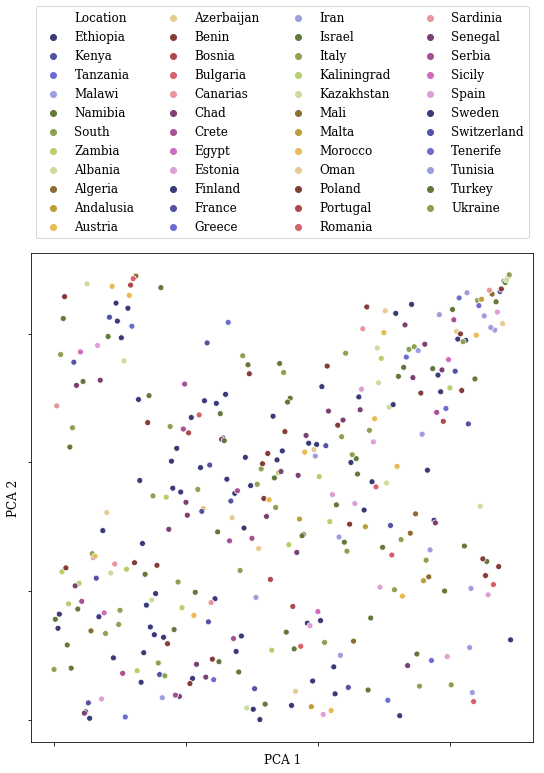

In [24]:
#print(df['loc'])
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Location'],palette="tab20b")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2")
plt.xlabel("PCA 1")
plt.xticks(rotation=90)
#plt.axis('off')
plt.xticks([0,100,200,300],[])
plt.yticks([0,100,200,300],[])
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
          ncol=4, mode="expand", borderaxespad=0.4)
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA1_2_locs.png",bbox_inches="tight")
plt.show()

In [17]:
#print(df['loc'])
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],palette="magma_r")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2")
plt.xlabel("PCA 1")
plt.xticks(rotation=90)
#plt.axis('off')
plt.xticks([0,100,200,300],[])
plt.yticks([0,100,200,300],[])
ml.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
          ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA1_2_hems.png",bbox_inches="tight")
plt.show()

#ValueError: Colormap mak is not recognized. Possible values are: Accent, 
#Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

KeyError: 'popID'

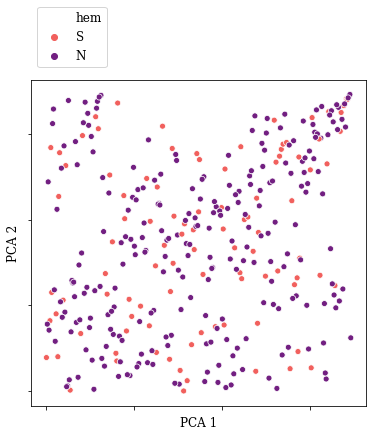

In [16]:
#print(df['loc'])
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['hem'],palette="magma_r")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2")
plt.xlabel("PCA 1")
plt.xticks(rotation=90)
#plt.axis('off')
plt.xticks([0,100,200,300],[])
plt.yticks([0,100,200,300],[])
ml.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')#,
          #ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA1_2_NvsS.png",bbox_inches="tight")
plt.show()

In [ ]:
txt2 = open("pacbio.hic.scaflen.merge.txt").read()
split_file2 = txt2.split('\n')
fram=[]
for i in split_file2:
    ii=i.replace('>', '')
    iii=''.join(ii)
    j=iii.split()
    fram+=[j]

#print(fram)   
#df3 = pd.DataFrame(fram)
#df3

txt = open("busco_scaffold.txt").read()
split_file = txt.split('\n')
#print(txt2)
fram2=[]
for i in split_file:
    ii=i.replace('>', '')
    iii=''.join(ii)
    j=iii.split()
    fram2+=[j]
    
#print(fram2)

#comb_data=pd.DataFrame(data)
#data = {"ScaffoldID": fram, "Scaffold_Length","N_BUSCOs","BUSCOs_coverage"   'Name':['Tom', 'nick', 'krish', 'jack'], 
     #   'Age':[20, 21, 19, 18]} 
#comb_data=pd.DataFrame(data)

df3 = pd.DataFrame(fram2, columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage"])
df3["N_BUSCOs"]=pd.to_numeric(df3["N_BUSCOs"])
df3["BUSCOs_coverage"]=pd.to_numeric(df3["BUSCOs_coverage"])

df4=pd.DataFrame(fram, columns = ["ID", "Scaffold_Length"])
df4["Scaffold_Length"]=pd.to_numeric(df4["Scaffold_Length"])

df4

dat2 = df3
dat1 = df4
comb_data=dat1.join(dat2)
comb_data
comb_data = comb_data.sort_values("Scaffold_Length", ascending=False)